# Solving the n-Queens Problem using Local Search

Points: 10

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board:

> minimize: $\mathbf{q}^* = \operatorname{argmin}_\mathbf{q} \operatorname{conflicts}(\mathbf{q})$
>
> minimize: $\mathbf{q}^* = \operatorname{argmin} \operatorname{conflicts}(\mathbf{q})$
>
> minimize: $\mathbf{q}^* = \operatorname{argmin} \operatorname{conflicts}$
>
> minimize: $\operatorname{argmin}_\mathbf{q} \operatorname{conflicts}(\mathbf{q})$
>
> minimize: $\operatorname{argmin}_\mathbf{q}$
>
> subject to: $\mathbf{q} \ \text{contains only one queen per column}$

Note that for this problem there is always an arrangement $\mathbf{q}^*$ with $\operatorname{conflicts}(\mathbf{q}^*) = 0$. 

* __Local improvement move:__ Move one queen to a different row in its column.

## Helper functions

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))


def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""
    
    board = np.array(board)
    
    n = len(board)
    conflicts = 0

    # check horizontal (we do not check vertical since the state space is restricted to one queen per col)
    for i in range(n): conflicts += math.comb(np.sum(board == i), 2)
    #print(f"Horizontal conflicts: {conflicts}")
    
    # check for each queen diagonally up and down (only to the right side of the queen)
    for j in range(n):
        q_up = board[j]
        q_down = board[j]
     
        for jj in range(j+1, n):
            q_up -= 1
            q_down += 1
            if board[jj] == q_up: conflicts += 1
            if board[jj] == q_down: conflicts += 1
        #print(f"Conflicts after queen {j}: {conflicts}")
       
    return(conflicts)
        

def show_board(board, cols = ['white', 'gray']):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = 48, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


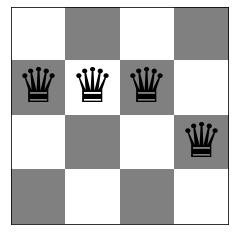

Queens (left to right) are at rows: [1 1 1 2]
Number of conflicts: 4


In [8]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


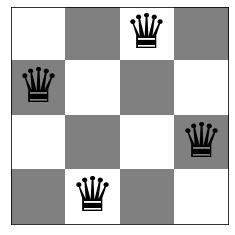

In [13]:
board = [1,3,0,2]
show_board(board)

## Steepest-ascend Hill Climbing Search [2 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

In [4]:
# Code goes here

## Stochastic Hill Climbing [1 Point]

Chooses randomly from among all uphill moves.

In [6]:
# Code goes here

## First-choice Hill Climbing [2 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state. __Note:__ Detecting local optima is tricky! You can for example stop if you were not able to improve the objective function in the last $x$ tries.

In [7]:
# Code goes here

## Hill Climbing Search with Random Restarts [1 Point]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution.   

In [5]:
# Code goes here

## Simulated Annealing [2 Points]

You have to experiment with the annealing schedule.

In [8]:
# Code goes here

## Compare Performance [2 Points]

Use runtime, scalability, and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [9]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.21195411682128906 milliseconds


In [10]:
# Code and results go here

## Bonus: Genetic Algorithm [+1 Point]

In [11]:
# Code goes here